<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [56]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [57]:
# Command(s)
import math
count = 0
#iterate trough all rows in dataframe and check each value
for index, row in auto.iterrows():
    if (math.isnan(row['mpg'])):
        count= count+1
    elif (math.isnan(row['cylinders'])):  
        count = count+1
    elif (math.isnan(row['displacement'])): 
        count = count+1
    elif (math.isnan(row['horsepower'])): 
        count = count+1
    elif (math.isnan(row['weight'])): 
        count = count+1
    elif (math.isnan(row['acceleration'])): 
        count = count+1
    elif (math.isnan(row['year'])): 
        count = count+1 
    elif (math.isnan(row['origin'])): 
        count = count+1 
    else:
        count = count 
   
print('total number of missing values is ',count)




total number of missing values is  5


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [58]:
# Command:
null_data = auto[auto.isnull().any(axis=1)]
print (null_data)
# horsepower values are missing for 5 columns 
# Comment (One - two sentence)
# For the rows in which horsepower is missing, cylinders is mostly 4 (6 in one case), mpg is on the higher side, displacement is on the lower side,  weight is on the lower side, and acceleration on higher side than the one having horsepower values.

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [59]:
# Command(s):
auto=auto.fillna(auto.median())
# Comment (one sentence):
# This is not a good approach since these values may be dependent on other features and the records are very different from each other. A good approach would be to fix the values by considering similar records

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [60]:
# Develop the model 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split

X = auto.drop('mpg', axis=1)
y = auto[['mpg']]

# use 20% data for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# Comment on its quality 
regressor.score(X_test, y_test)
# [payal] using linear regression model, it is 84.77% accurate.  


Mean Absolute Error: 2.190277108294217
Mean Squared Error: 9.025060435238995
Root Mean Squared Error: 3.004173835722393


0.8477189412837604

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

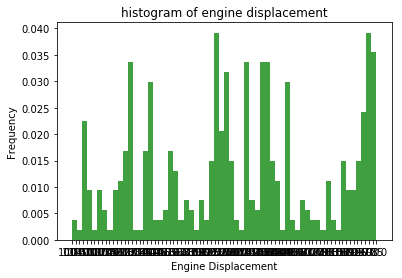

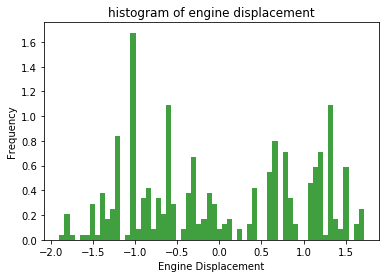

In [61]:
# Histogram of engine displacement
import matplotlib.pyplot as plt

x = auto[['displacement']]
n, bins, patches = plt.hist(x, 60, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')
plt.title('histogram of engine displacement')

plt.show()

# Plot histogram of this new feature to reveal normal-like distribution
from sklearn.preprocessing import power_transform
x=power_transform(x, method='box-cox', standardize=True, copy=True)
n, bins, patches = plt.hist(x, 60, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')
plt.title('histogram of engine displacement')

plt.show()

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [62]:
# Calculate then new model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split

auto['normalized_displacement']= power_transform(auto[['displacement']], method='box-cox', standardize=True, copy=True)
X = auto.drop(['mpg','displacement'], axis=1)
y = auto[['mpg']]

# use 20% data for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# Comment on its quality 
regressor.score(X_test, y_test)

# Comment on its performance
# error numbers are slilghly bigger than without normalization , also the model score is 83.94% which is 0.8% less than previous model
#Mean Absolute Error: 2.190447619401775
#Mean Squared Error: 9.51772507578615
#Root Mean Squared Error: 3.085081048495509
# 0.8394061445337639


Mean Absolute Error: 2.190447619401775
Mean Squared Error: 9.51772507578615
Root Mean Squared Error: 3.085081048495509


0.8394061445337639

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [72]:
print('The mean and standard deviation for mpg are %f and %f' %(auto[['mpg']].mean(), auto[['mpg']].std()))
print('The mean and standard deviation for cylinders are %f and %f' %(auto[['cylinders']].mean(), auto[['cylinders']].std()))
print('The mean and standard deviation for displacement are %f and %f' %(auto[['displacement']].mean(), auto[['displacement']].std()))
print('The mean and standard deviation for horsepower are %f and %f' %(auto[['horsepower']].mean(), auto[['horsepower']].std()))
print('The mean and standard deviation for weight are %f and %f' %(auto[['weight']].mean(), auto[['weight']].std()))
print('The mean and standard deviation for acceleration are %f and %f' %(auto[['acceleration']].mean(), auto[['acceleration']].std()))
print('The mean and standard deviation for year are %f and %f' %(auto[['year']].mean(), auto[['year']].std()))
print('The mean and standard deviation for origin are %f and %f' %(auto[['origin']].mean(), auto[['origin']].std()))


The mean and standard deviation for mpg are 23.515869 and 7.825804
The mean and standard deviation for cylinders are 5.458438 and 1.701577
The mean and standard deviation for displacement are 193.532746 and 104.379583
The mean and standard deviation for horsepower are 104.331234 and 38.266994
The mean and standard deviation for weight are 2970.261965 and 847.904119
The mean and standard deviation for acceleration are 15.555668 and 2.749995
The mean and standard deviation for year are 75.994962 and 3.690005
The mean and standard deviation for origin are 1.574307 and 0.802549


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [75]:
# Center and scale
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split

X = auto.drop('mpg', axis=1)
X_scaled = preprocessing.scale(X)
y = auto[['mpg']]

# Recalculate the model
# use 20% data for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Comment on its performance
print('Score:',regressor.score(X_test, y_test))
# model performs better after scaling, score is 86.12%

Mean Absolute Error: 2.0566209548602528
Mean Squared Error: 8.225734948861316
Root Mean Squared Error: 2.8680542095402095
Score: 0.8612060677354785


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [ ]:
#what was your incoming experience with this model, if any?
# [payal] I have used linear regression which is same as we used in lab2 assignment , the incoming exerience was about tailoring the data for better performance
#what steps you took, what obstacles you encountered.
# [payal] I used available python libraries so simplementation was easy using public API documentation, hwoever it took some time and effort to understand what was going on inside these functions and how data updates were changing model performance 
#how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
#[payal] This is very relevant since data is not complete and perfect in real world. It is very useful to know the different strategies to work with incomplete data and their pros and cons.